In [3]:
import librosa
import ffmpeg
import os
# import torch
# import torch.nn.functional as Func
# import torch.nn as nn
import numpy as np
# from torch.autograd import Variable
# import torch.optim as optim
# import torch.utils.data as data
# from torch.nn.utils.rnn import pack_padded_sequence
# from torch.nn.utils.rnn import pad_packed_sequence
import copy

import numpy as np
import matplotlib.pyplot as plt

In [4]:
import os

train_clean_male_filenames=os.listdir(r"Speech Data/IEEE/IEEE_male/train_male")
dev_clean_male_filenames=os.listdir(r"Speech Data/IEEE/IEEE_male/development_male")
test_clean_male_filenames=os.listdir(r"Speech Data/IEEE/IEEE_male/test_male")

train_clean_female_filenames=os.listdir(r"Speech Data/IEEE/IEEE_female/train_female")
dev_clean_female_filenames=os.listdir(r"Speech Data/IEEE/IEEE_female/development_female")
test_clean_female_filenames=os.listdir(r"Speech Data/IEEE/IEEE_female/test_female")

print("CLEAN--> Male: Train Length: {} , Dev Length {} , Test length {} ".format(len(train_clean_male_filenames),len(dev_clean_male_filenames),len(test_clean_male_filenames)))
print("CLEAN--> Female: Train Length: {} , Dev Length {} , Test length {} ".format(len(train_clean_female_filenames),len(dev_clean_female_filenames),len(test_clean_female_filenames)))

train_noisy_male_filenames=os.listdir(r"PREPARED_DATASET/TRAIN_MALE/")
dev_noisy_male_filenames=os.listdir(r"PREPARED_DATASET/DEV_MALE/")
test_noisy_male_filenames=os.listdir(r"PREPARED_DATASET/TEST_MALE/")

train_noisy_female_filenames=os.listdir(r"PREPARED_DATASET/TRAIN_FEMALE/")
dev_noisy_female_filenames=os.listdir(r"PREPARED_DATASET/DEV_FEMALE/")
test_noisy_female_filenames=os.listdir(r"PREPARED_DATASET/TEST_FEMALE/")

print("NOISY --> Male: Train Length: {} , Dev Length {} , Test length {} ".format(len(train_noisy_male_filenames),len(dev_noisy_male_filenames),len(test_noisy_male_filenames)))
print("NOISY --> Female: Train Length: {} , Dev Length {} , Test length {} ".format(len(train_noisy_female_filenames),len(dev_noisy_female_filenames),len(test_noisy_female_filenames)))
########################################################################################
#########################################################################################
# Train Clean Speech
train_cleanSpeechList = train_clean_male_filenames+train_clean_female_filenames
train_cleanSpeechLength = len(train_cleanSpeechList)
print("Train Clean Total length (Male + Female) : ",train_cleanSpeechLength)

#.npy output folder
train_clean_PyPath = './Data/npy/Train_frame/Clean'

# Train Noisy Speech
train_noisySpeechList = train_noisy_male_filenames+train_noisy_female_filenames
train_noisySpeechLength = len(train_noisySpeechList)
print("Train Noisy Total length (Male + Female) : ",train_noisySpeechLength)

#.npy output folder
train_noisy_PyPath = './Data/npy/Train_frame/Noisy'


#########################################################################################
#########################################################################################
# Dev Clean Speech
dev_cleanSpeechList = dev_clean_male_filenames+dev_clean_female_filenames
dev_cleanSpeechLength = len(dev_cleanSpeechList)
print("Dev Clean Total length (Male + Female) : ",dev_cleanSpeechLength)

#.npy output folder
dev_clean_PyPath = './Data/npy/Dev_frame/Clean'

# Dev Noisy Speech
dev_noisySpeechList = dev_noisy_male_filenames+dev_noisy_female_filenames
dev_noisySpeechLength = len(dev_noisySpeechList)
print("Dev Noisy Total length (Male + Female) : ",dev_noisySpeechLength)

#.npy output folder
dev_noisy_PyPath = './Data/npy/Dev_frame/Noisy'


#########################################################################################
# Test Clean Speech
test_cleanSpeechList = test_clean_male_filenames+test_clean_female_filenames
test_cleanSpeechLength = len(test_cleanSpeechList)
print("Test Clean Total length (Male + Female) : ",test_cleanSpeechLength)


test_clean_PyPath = './Data/npy/Test_frame/Clean'

# Test Noisy Speech
test_noisySpeechList = test_noisy_male_filenames+test_noisy_female_filenames
test_noisySpeechLength = len(test_noisySpeechList)
print("Test Noisy Total length (Male + Female) : ",test_noisySpeechLength)

#.npy output folder
test_noisy_PyPath = './Data/npy/Test_frame/Noisy'

######################################################################################
#Data Path for training data
train_noisyPath = 'PREPARED_DATASET/TRAIN/'  # Used
train_cleanPath = 'PREPARED_DATASET/CLEAN/TRAIN/'
dev_noisyPath = 'PREPARED_DATASET/DEV/'  # Used
dev_cleanPath = 'PREPARED_DATASET/CLEAN/DEV/'
test_noisyPath = 'PREPARED_DATASET/TEST/'
test_cleanPath = 'PREPARED_DATASET/CLEAN/TEST/'
restfiles_Path = 'PREPARED_DATASET/REST_FILES/'

CLEAN--> Male: Train Length: 500 , Dev Length 100 , Test length 100 
CLEAN--> Female: Train Length: 500 , Dev Length 100 , Test length 100 
NOISY --> Male: Train Length: 4500 , Dev Length 900 , Test length 900 
NOISY --> Female: Train Length: 4500 , Dev Length 900 , Test length 900 
Train Clean Total length (Male + Female) :  1000
Train Noisy Total length (Male + Female) :  9000
Dev Clean Total length (Male + Female) :  200
Dev Noisy Total length (Male + Female) :  1800
Test Clean Total length (Male + Female) :  200
Test Noisy Total length (Male + Female) :  1800


# Train Data

In [105]:
# ONLY FOR TRAIN DATA ----NOISY SPEECH
combined_file_arr=np.zeros(shape=(257,1))
import matplotlib.pyplot as plt
for index in range (0,len(train_noisySpeechList)): # For each noisy speech
#     print(index)
    xFile = train_noisySpeechList[index]
    sx,sr = librosa.load(train_noisyPath + xFile,sr=16000)
    X = librosa.stft(sx,n_fft=512,hop_length=160,win_length=320)
    X = 10*np.log10(np.abs(X))            
    combined_file_arr=np.concatenate((combined_file_arr,X),axis=1)
temp=combined_file_arr[:,0]
print(combined_file_arr[:,0])
combined_file_arr=np.delete(combined_file_arr, 0, 1)
print(combined_file_arr[:,0])
np.save('Train_noisy.npy',combined_file_arr)

In [4]:
import math
combined_file_arr=np.load('Train_noisy.npy')
combined_file_arr[combined_file_arr==-math.inf]=-100
# Cipping value to -100 where we have -inf values.
combined_file_arr.shape


(257, 2290473)

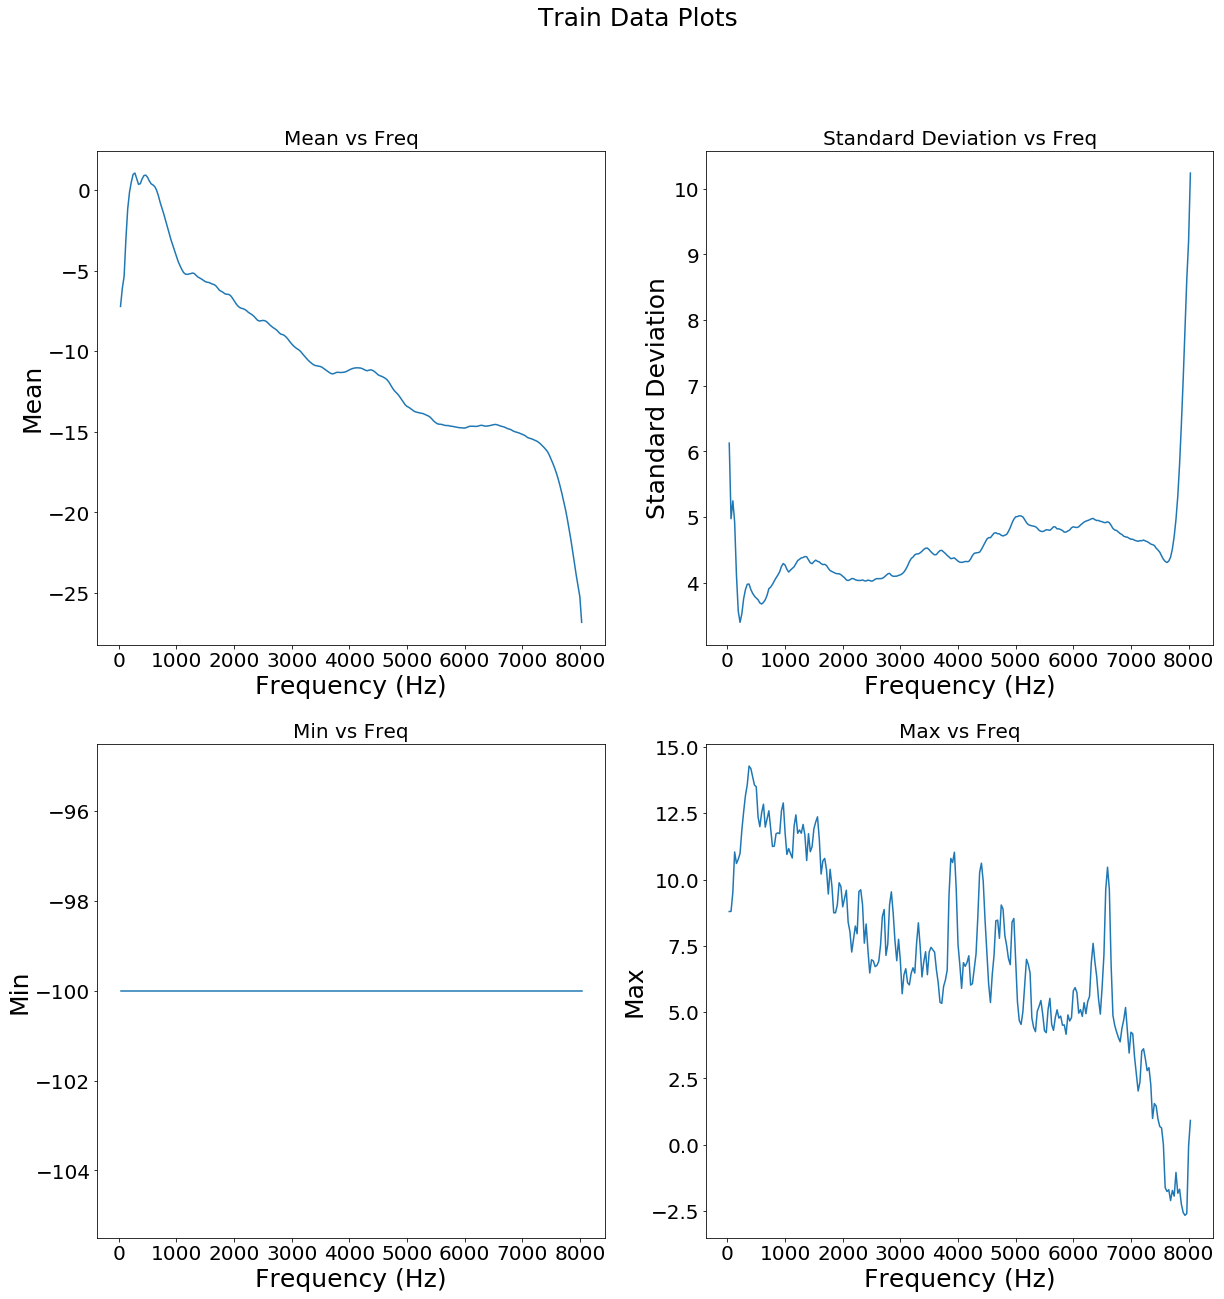

In [119]:
mean_X=np.mean(combined_file_arr,axis=1)
std_X=np.std(combined_file_arr,axis=1)
min_X=np.min(combined_file_arr,axis=1)
max_X=np.max(combined_file_arr,axis=1)
def plot_figure(index,title,xlabel,ylabel,data):
    plt.subplot(2, 2, index)
    plt.plot(np.array(range(0,257))*16000/512,data)
    plt.title(title,fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel(xlabel,fontsize=25)
    plt.ylabel(ylabel,fontsize=25)
plt.figure(figsize=(20,20))
plt.suptitle("Train Data Plots",fontsize=25)
plot_figure(1,'Mean vs Freq','Frequency (Hz)','Mean',mean_X)
plot_figure(2,'Standard Deviation vs Freq','Frequency (Hz)','Standard Deviation',std_X)
plot_figure(3,'Min vs Freq','Frequency (Hz)','Min',min_X)
plot_figure(4,'Max vs Freq','Frequency (Hz)','Max',max_X)
plt.show()

# # np.array(range(1,258))*16000/512

In [ ]:
# In above figure Minimum is having -100 because 

### Standardization Train Data

In [14]:
import math
combined_file_arr=np.load('Train_noisy.npy')
combined_file_arr[combined_file_arr==-math.inf]=-100
combined_file_arr.shape
mean_X=np.mean(combined_file_arr,axis=1)
std_X=np.std(combined_file_arr,axis=1)
min_X=np.min(combined_file_arr,axis=1)
max_X=np.max(combined_file_arr,axis=1)
combined_file_arr=np.divide(np.subtract(combined_file_arr,mean_X.reshape(257,1)),std_X.reshape(257,1))
np.save('Standardization_Train_noisy.npy',combined_file_arr)

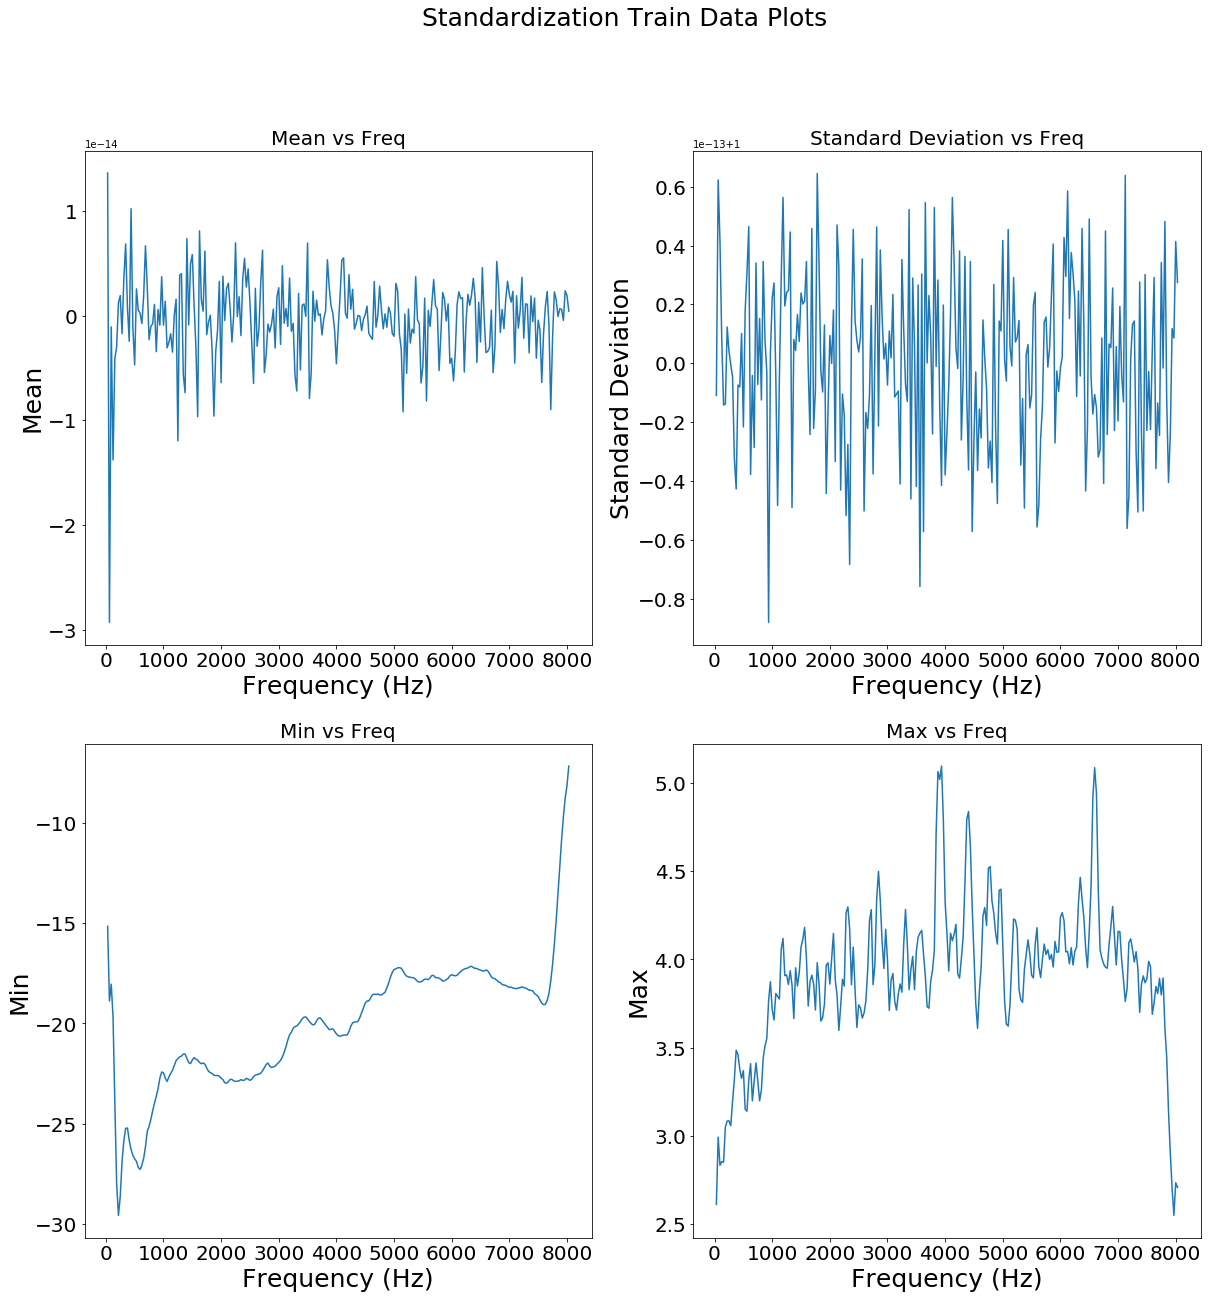

In [15]:
mean_X=np.mean(combined_file_arr,axis=1)
std_X=np.std(combined_file_arr,axis=1)
min_X=np.min(combined_file_arr,axis=1)
max_X=np.max(combined_file_arr,axis=1)
def plot_figure(index,title,xlabel,ylabel,data):
    plt.subplot(2, 2, index)
    plt.plot(np.array(range(0,257))*16000/512,data)
    plt.title(title,fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel(xlabel,fontsize=25)
    plt.ylabel(ylabel,fontsize=25)
plt.figure(figsize=(20,20))
plt.suptitle("Standardization Train Data Plots",fontsize=25)
plot_figure(1,'Mean vs Freq','Frequency (Hz)','Mean',mean_X)
plot_figure(2,'Standard Deviation vs Freq','Frequency (Hz)','Standard Deviation',std_X)
plot_figure(3,'Min vs Freq','Frequency (Hz)','Min',min_X)
plot_figure(4,'Max vs Freq','Frequency (Hz)','Max',max_X)
plt.show()

# # np.array(range(1,258))*16000/512

### Normalization Train Data

In [9]:
import math
combined_file_arr=np.load('Train_noisy.npy')
combined_file_arr[combined_file_arr==-math.inf]=-100
combined_file_arr.shape
mean_X=np.mean(combined_file_arr,axis=1)
std_X=np.std(combined_file_arr,axis=1)
min_X=np.min(combined_file_arr,axis=1)
max_X=np.max(combined_file_arr,axis=1)
combined_file_arr=np.divide(np.subtract(combined_file_arr,min_X.reshape(257,1)),np.subtract(max_X.reshape(257,1),min_X.reshape(257,1)))
np.save('Normalization_Train_noisy.npy',combined_file_arr)

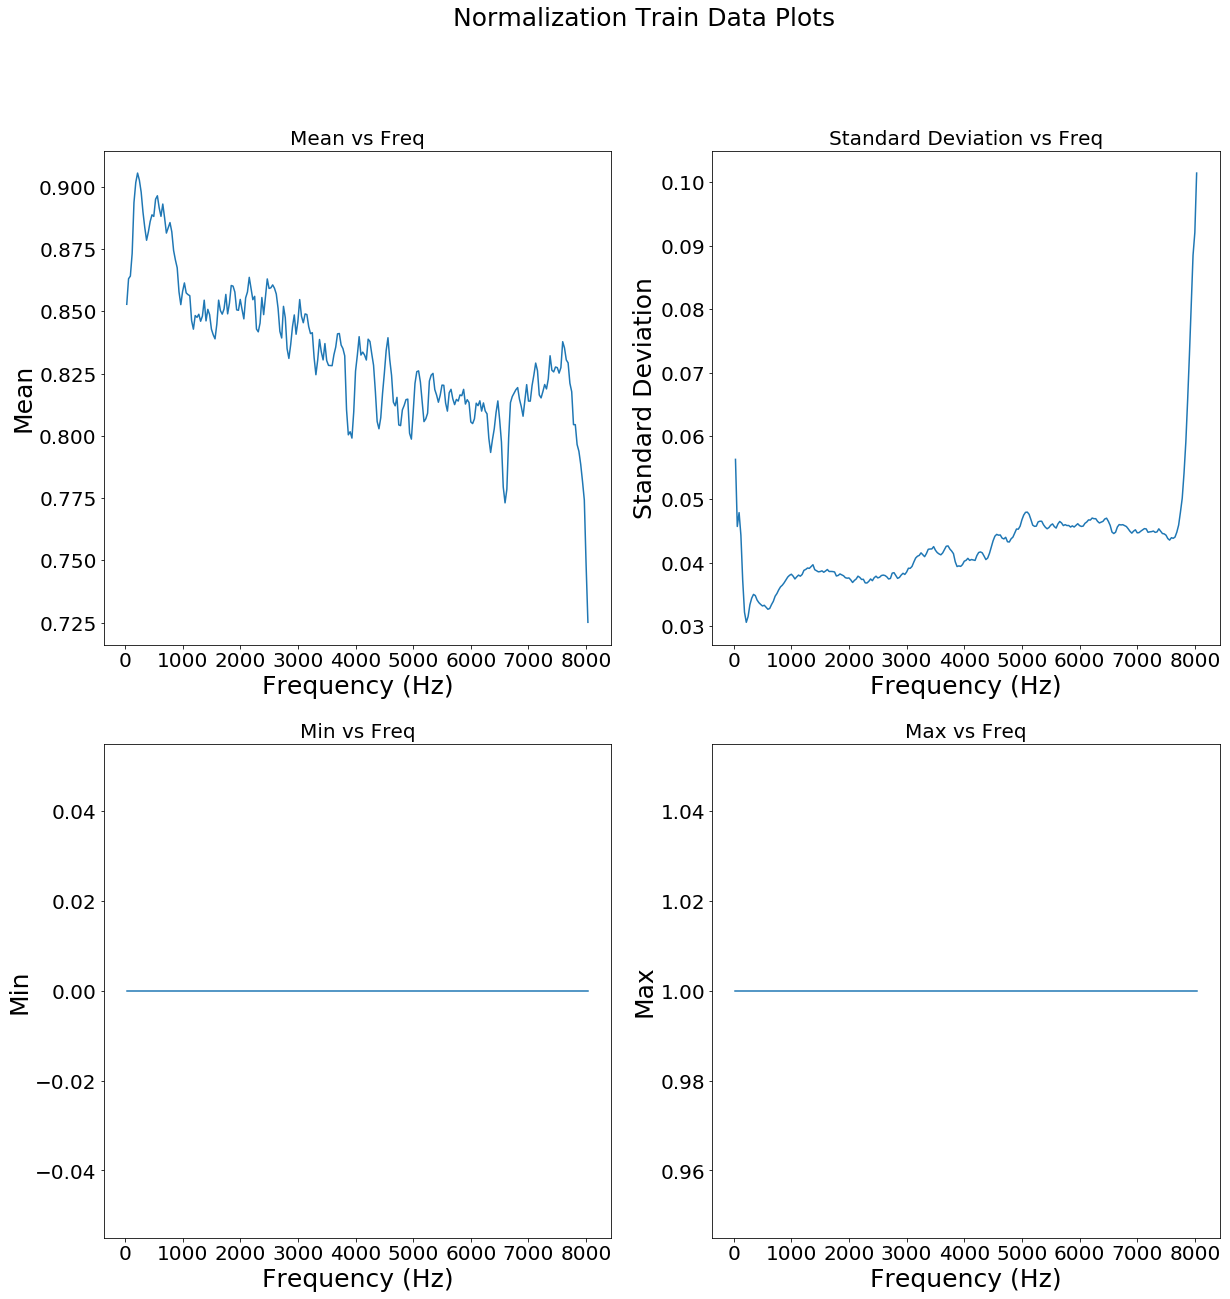

In [10]:
combined_file_arr=np.load('Normalization_Train_noisy.npy')
mean_X=np.mean(combined_file_arr,axis=1)
std_X=np.std(combined_file_arr,axis=1)
min_X=np.min(combined_file_arr,axis=1)
max_X=np.max(combined_file_arr,axis=1)
def plot_figure(index,title,xlabel,ylabel,data):
    plt.subplot(2, 2, index)
    plt.plot(np.array(range(0,257))*16000/512,data)
    plt.title(title,fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel(xlabel,fontsize=25)
    plt.ylabel(ylabel,fontsize=25)
plt.figure(figsize=(20,20))
plt.suptitle("Normalization Train Data Plots",fontsize=25)
plot_figure(1,'Mean vs Freq','Frequency (Hz)','Mean',mean_X)
plot_figure(2,'Standard Deviation vs Freq','Frequency (Hz)','Standard Deviation',std_X)
plot_figure(3,'Min vs Freq','Frequency (Hz)','Min',min_X)
plot_figure(4,'Max vs Freq','Frequency (Hz)','Max',max_X)
plt.show()

# # np.array(range(1,258))*16000/512

### Development Data

In [91]:
# ONLY FOR DEVELOPMENT DATA ---- NOISY SPEECH

combined_file_arr=np.zeros(shape=(257,1))
import matplotlib.pyplot as plt
for index in range (0,len(dev_noisySpeechList)): # For each noisy speech
    print(index)
    xFile = dev_noisySpeechList[index]
    sx,sr = librosa.load(dev_noisyPath + xFile,sr=16000)
    X = librosa.stft(sx,n_fft=512,hop_length=160,win_length=320)
    X = 10*np.log10(np.abs(X))            
    combined_file_arr=np.concatenate((combined_file_arr,X),axis=1)

In [92]:
temp=combined_file_arr[:,0]
print(combined_file_arr[:,0])
combined_file_arr=np.delete(combined_file_arr, 0, 1)
print(combined_file_arr[:,0])
np.save('Dev_noisy.npy',combined_file_arr)

In [16]:
combined_file_arr=np.load('Dev_noisy.npy')
combined_file_arr[combined_file_arr==-math.inf]=-100
combined_file_arr.shape

(257, 478728)

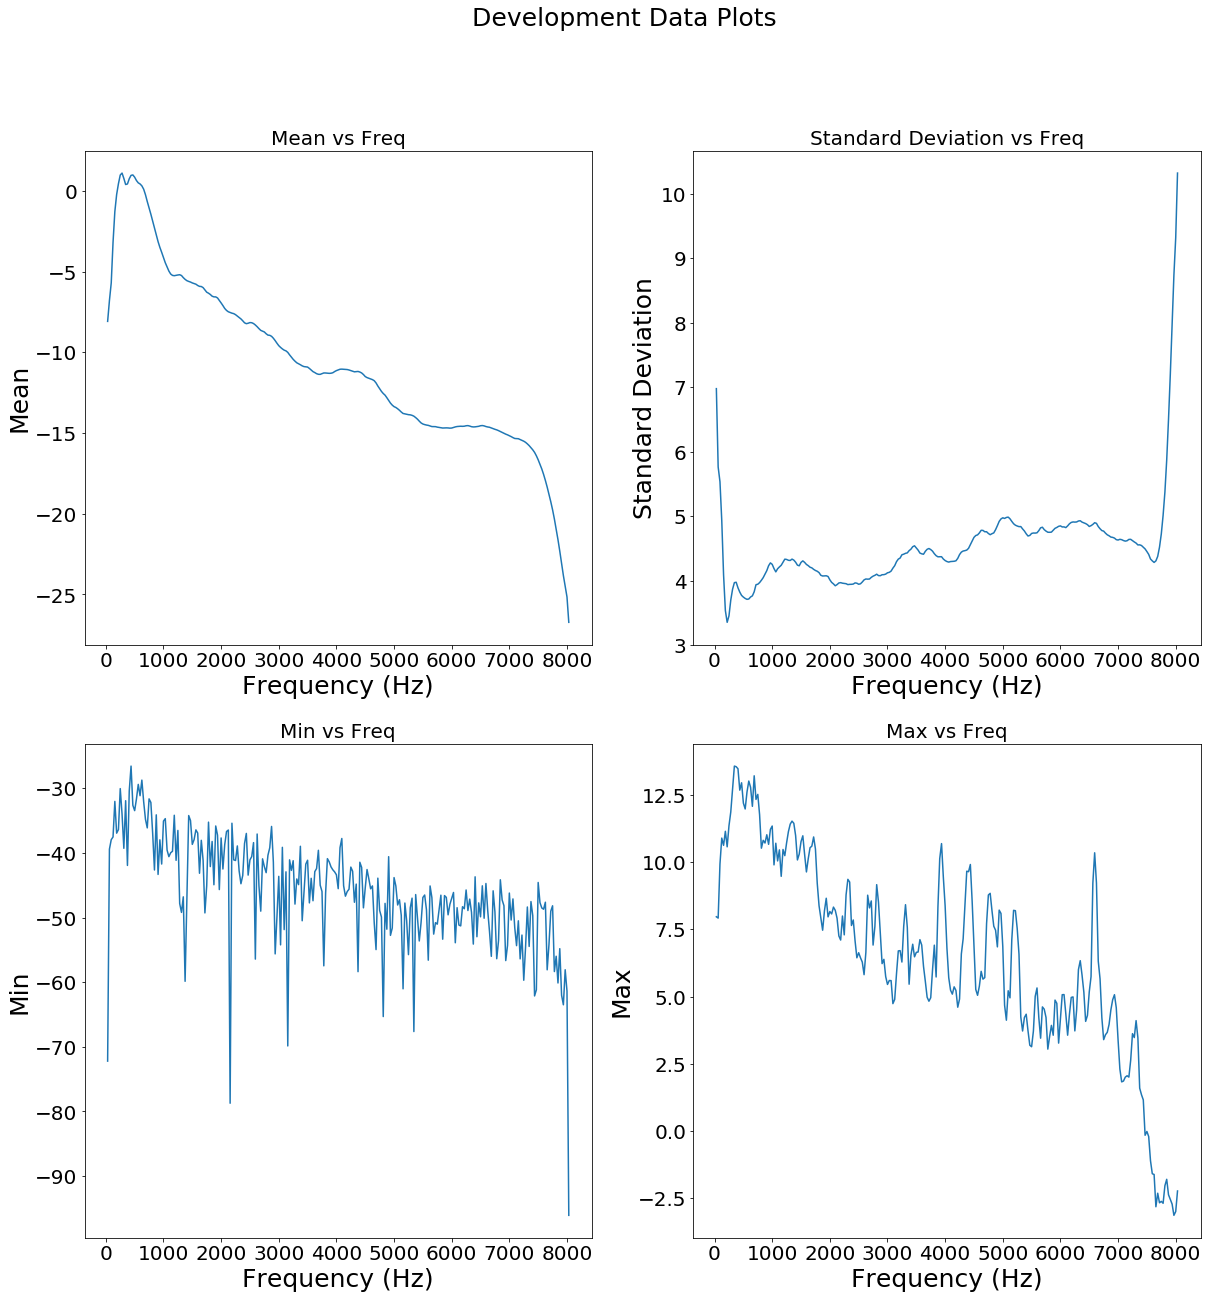

In [17]:
mean_X=np.mean(combined_file_arr,axis=1)
std_X=np.std(combined_file_arr,axis=1)
min_X=np.min(combined_file_arr,axis=1)
max_X=np.max(combined_file_arr,axis=1)
def plot_figure(index,title,xlabel,ylabel,data):
    plt.subplot(2, 2, index)
    plt.plot(np.array(range(0,257))*16000/512,data)
    plt.title(title,fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel(xlabel,fontsize=25)
    plt.ylabel(ylabel,fontsize=25)
plt.figure(figsize=(20,20))
plt.suptitle("Development Data Plots",fontsize=25)
plot_figure(1,'Mean vs Freq','Frequency (Hz)','Mean',mean_X)
plot_figure(2,'Standard Deviation vs Freq','Frequency (Hz)','Standard Deviation',std_X)
plot_figure(3,'Min vs Freq','Frequency (Hz)','Min',min_X)
plot_figure(4,'Max vs Freq','Frequency (Hz)','Max',max_X)
plt.show()

# # np.array(range(1,258))*16000/512

### Standardization Development Data

In [18]:
combined_file_arr=np.load('Dev_noisy.npy')
combined_file_arr[combined_file_arr==-math.inf]=-100
combined_file_arr.shape
mean_X=np.mean(combined_file_arr,axis=1)
std_X=np.std(combined_file_arr,axis=1)
min_X=np.min(combined_file_arr,axis=1)
max_X=np.max(combined_file_arr,axis=1)
combined_file_arr=np.divide(np.subtract(combined_file_arr,mean_X.reshape(257,1)),std_X.reshape(257,1))
np.save('Standardization_Dev_noisy.npy',combined_file_arr)

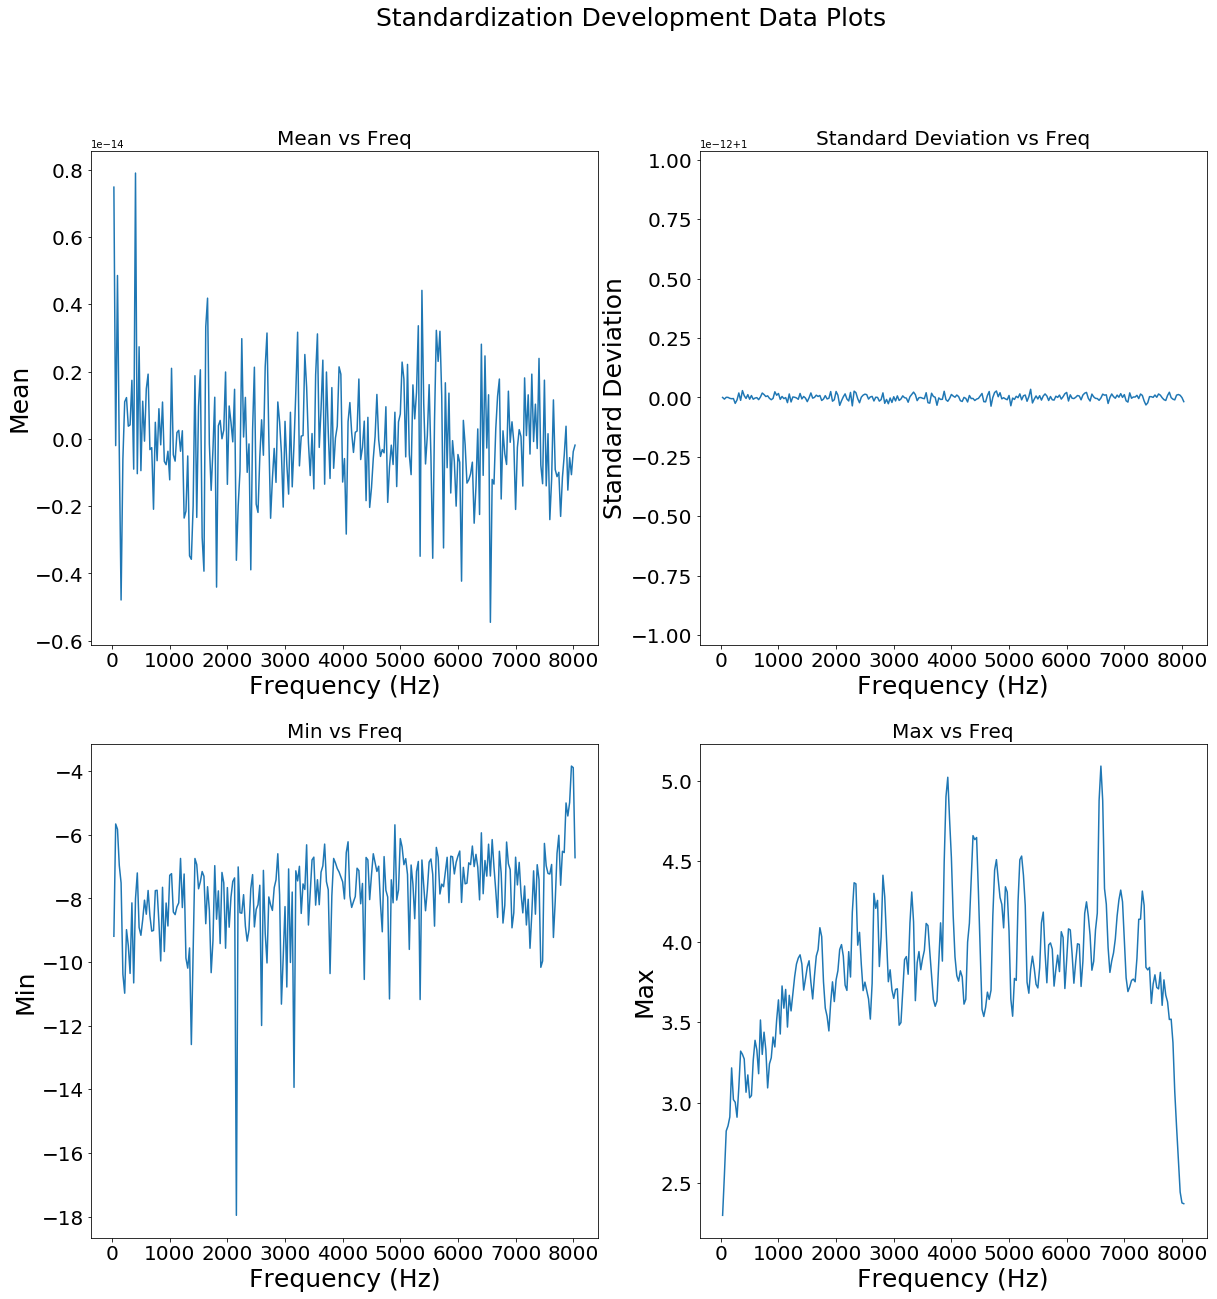

In [19]:
mean_X=np.mean(combined_file_arr,axis=1)
std_X=np.std(combined_file_arr,axis=1)
min_X=np.min(combined_file_arr,axis=1)
max_X=np.max(combined_file_arr,axis=1)
def plot_figure(index,title,xlabel,ylabel,data):
    plt.subplot(2, 2, index)
    plt.plot(np.array(range(0,257))*16000/512,data)
    plt.title(title,fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel(xlabel,fontsize=25)
    plt.ylabel(ylabel,fontsize=25)
plt.figure(figsize=(20,20))
plt.suptitle("Standardization Development Data Plots",fontsize=25)
plot_figure(1,'Mean vs Freq','Frequency (Hz)','Mean',mean_X)
plot_figure(2,'Standard Deviation vs Freq','Frequency (Hz)','Standard Deviation',std_X)
plot_figure(3,'Min vs Freq','Frequency (Hz)','Min',min_X)
plot_figure(4,'Max vs Freq','Frequency (Hz)','Max',max_X)
plt.show()

# # np.array(range(1,258))*16000/512

### Normalization Development Data

In [20]:
import math
combined_file_arr=np.load('Dev_noisy.npy')
combined_file_arr[combined_file_arr==-math.inf]=-100
combined_file_arr.shape
mean_X=np.mean(combined_file_arr,axis=1)
std_X=np.std(combined_file_arr,axis=1)
min_X=np.min(combined_file_arr,axis=1)
max_X=np.max(combined_file_arr,axis=1)
combined_file_arr=np.divide(np.subtract(combined_file_arr,min_X.reshape(257,1)),np.subtract(max_X.reshape(257,1),min_X.reshape(257,1)))
np.save('Normalization_Dev_noisy.npy',combined_file_arr)

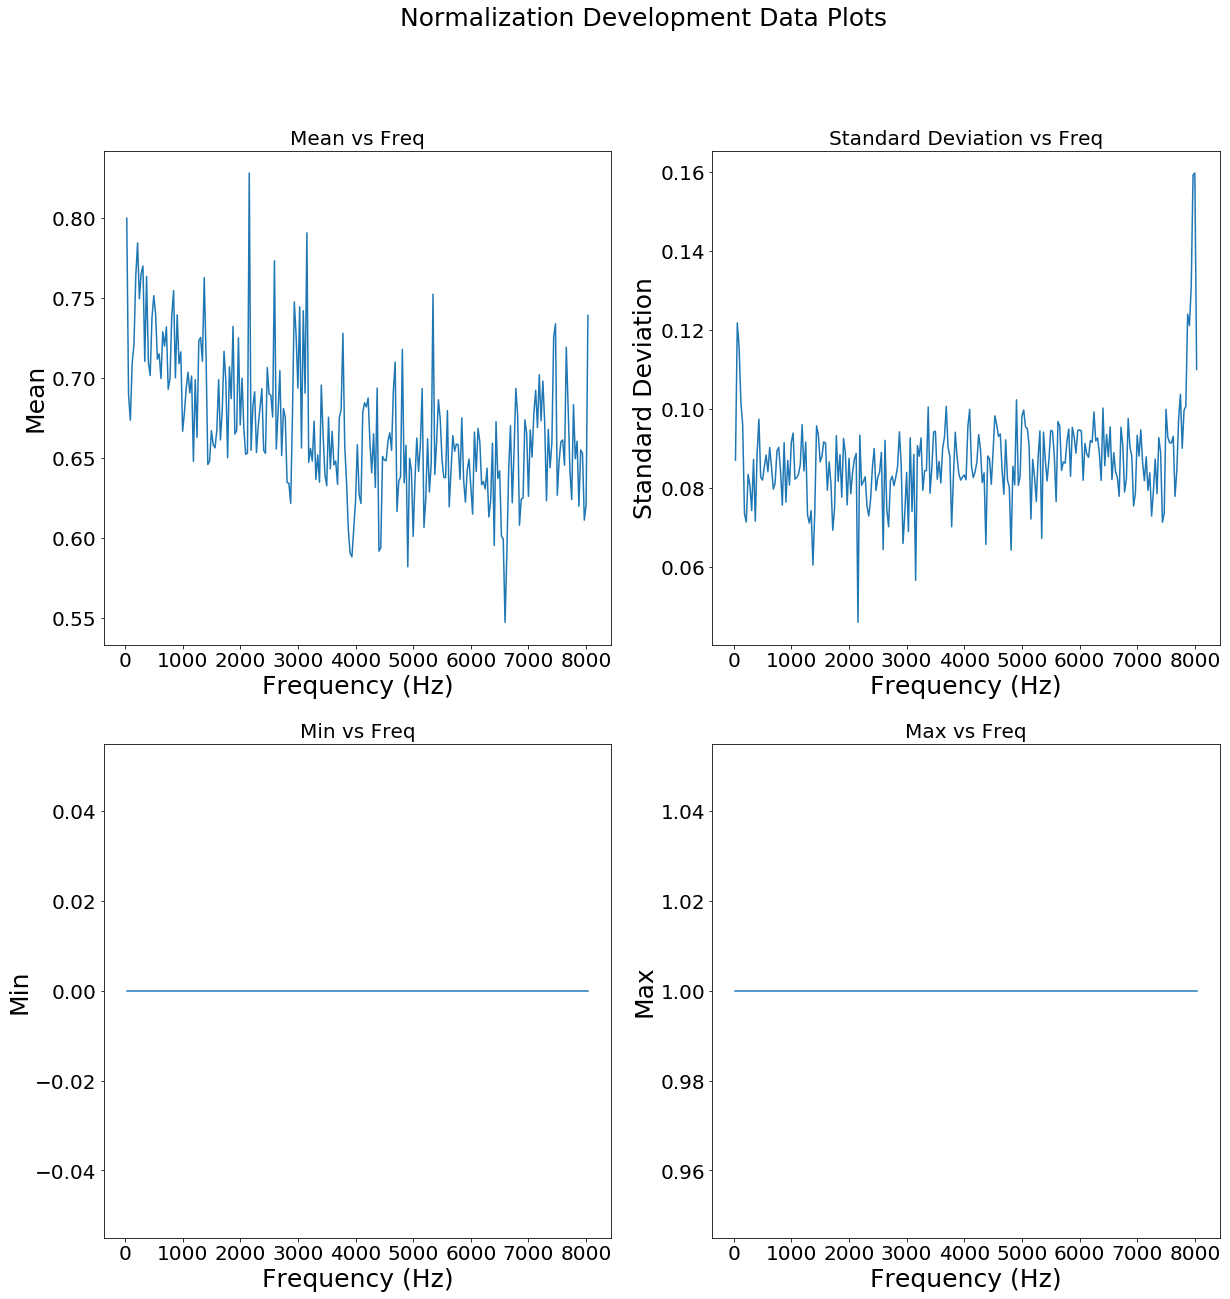

In [21]:
combined_file_arr=np.load('Normalization_Dev_noisy.npy')
mean_X=np.mean(combined_file_arr,axis=1)
std_X=np.std(combined_file_arr,axis=1)
min_X=np.min(combined_file_arr,axis=1)
max_X=np.max(combined_file_arr,axis=1)
def plot_figure(index,title,xlabel,ylabel,data):
    plt.subplot(2, 2, index)
    plt.plot(np.array(range(0,257))*16000/512,data)
    plt.title(title,fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel(xlabel,fontsize=25)
    plt.ylabel(ylabel,fontsize=25)
plt.figure(figsize=(20,20))
plt.suptitle("Normalization Development Data Plots",fontsize=25)
plot_figure(1,'Mean vs Freq','Frequency (Hz)','Mean',mean_X)
plot_figure(2,'Standard Deviation vs Freq','Frequency (Hz)','Standard Deviation',std_X)
plot_figure(3,'Min vs Freq','Frequency (Hz)','Min',min_X)
plot_figure(4,'Max vs Freq','Frequency (Hz)','Max',max_X)
plt.show()

# # np.array(range(1,258))*16000/512

In [5]:
# Preparing Training and Development target npy files

# ONLY FOR TRAIN DATA ----CLEAN SPEECH
combined_file_arr=np.zeros(shape=(257,1))
import matplotlib.pyplot as plt
for index in range (0,len(train_cleanSpeechList)): # For each noisy speech
#     print(index)
    xFile = train_cleanSpeechList[index]
    sx,sr = librosa.load(train_cleanPath + xFile,sr=16000)
    X = librosa.stft(sx,n_fft=512,hop_length=160,win_length=320)
    X = np.abs(X)
    for i in range(0,9):
        combined_file_arr=np.concatenate((combined_file_arr,X),axis=1)
temp=combined_file_arr[:,0]
# print(combined_file_arr[:,0])
combined_file_arr=np.delete(combined_file_arr, 0, 1)
# print(combined_file_arr[:,0])
np.save('Train_clean.npy',combined_file_arr)

# (257, 2290473)

In [6]:
# Preparing Training and Development target npy files

# ONLY FOR DEVELOPMENT DATA ---->CLEAN SPEECH
combined_file_arr=np.zeros(shape=(257,1))
import matplotlib.pyplot as plt
for index in range (0,len(dev_cleanSpeechList)): # For each noisy speech
#     print(index)
    xFile = dev_cleanSpeechList[index]
    sx,sr = librosa.load(dev_cleanPath + xFile,sr=16000)
    X = librosa.stft(sx,n_fft=512,hop_length=160,win_length=320)
    X = np.abs(X)
    for i in range(0,9):
        combined_file_arr=np.concatenate((combined_file_arr,X),axis=1)
        
temp=combined_file_arr[:,0]
# print(combined_file_arr[:,0])
combined_file_arr=np.delete(combined_file_arr, 0, 1)
# print(combined_file_arr[:,0])
np.save('Dev_clean.npy',combined_file_arr)

In [7]:
# ONLY FOR TEST DATA ----CLEAN SPEECH
combined_file_arr=np.zeros(shape=(257,1))
import matplotlib.pyplot as plt
for index in range (0,len(test_cleanSpeechList)): # For each noisy speech
#     print(index)
    xFile = test_cleanSpeechList[index]
    sx,sr = librosa.load(test_cleanPath + xFile,sr=16000)
    X = librosa.stft(sx,n_fft=512,hop_length=160,win_length=320)
    X = np.abs(X)
    for i in range(0,9):
        combined_file_arr=np.concatenate((combined_file_arr,X),axis=1)
temp=combined_file_arr[:,0]
# print(combined_file_arr[:,0])
combined_file_arr=np.delete(combined_file_arr, 0, 1)
# print(combined_file_arr[:,0])
np.save('Test_clean.npy',combined_file_arr)
# print("Test Shape: ",combined_file_arr.shape)

# Test Shape:  (257, 480330)

In [32]:
# ONLY FOR TEST DATA ----NOISY SPEECH
combined_file_arr=np.zeros(shape=(257,1))
import matplotlib.pyplot as plt
for index in range (0,len(test_noisySpeechList)): # For each noisy speech
#     print(index)
    xFile = test_noisySpeechList[index]
    sx,sr = librosa.load(test_noisyPath + xFile,sr=16000)
    X = librosa.stft(sx,n_fft=512,hop_length=160,win_length=320)
    X = 10*np.log10(np.abs(X))
    combined_file_arr=np.concatenate((combined_file_arr,X),axis=1)
temp=combined_file_arr[:,0]
# print(combined_file_arr[:,0])
combined_file_arr=np.delete(combined_file_arr, 0, 1)
# print(combined_file_arr[:,0])
np.save('Test_noisy.npy',combined_file_arr)
# print("Test Shape: ",combined_file_arr.shape)

# Test Shape:  (257, 480330)

In [45]:
sx,sr = librosa.load('',sr=16000)
noisy = librosa.stft(sx,n_fft=512,hop_length=160,win_length=320)
noisy2 = np.abs(noisy) 

sx,sr = librosa.load('PREPARED_DATASET/TRAIN/l01s01__0_0.wav',sr=16000)
speech = librosa.stft(sx,n_fft=512,hop_length=160,win_length=320)
speech2 = 10*np.log10(np.abs(speech)) 



In [48]:
combined_file_arr=np.load('Normalization_Dev_noisy.npy')